<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/MLNS/Segmentaciones1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans #segmentación solo de variables numéricas, particularidad de los modelos de mixturas gausianas
from sklearn.preprocessing import StandardScaler     ## Transformar variables
from sklearn.decomposition import PCA               ## Componentes principales, agrupamiento de variables
from sklearn.mixture import GaussianMixture          ## Elección del número de cluster por BIC y AIC

In [3]:
camp12 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MAESTRIA/UNI/DS/CICLO/2ND/2_ML_NO_SUPERVISADO/BBDD/data cluster países.xlsx') ## Importar Data
camp12.head()

,CodPais,PKEbelista,CodEbelista,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF,PPU_Lbel,PPU_Esika,PPU_Cyzone,PPU_CP,PPU_FG,PPU_MQ,PPU_TC,PPU_TF,Perfil
0,CL,677351,723124,3.0,10.0,1.0,0.0,0.0,69.0,0.0,0.0,4.8403,2.7058,3.5798,0.0000,0.0000,3.2538,0.000,0.0000,2
1,CL,677175,722921,1.0,4.0,3.0,1.0,5.0,24.0,6.0,0.0,2.9011,5.2601,4.5171,5.3251,10.3686,3.2237,5.519,0.0000,6
2,CL,677174,722920,1.0,9.0,3.0,0.0,12.0,60.0,0.0,0.0,8.5910,3.4853,4.2457,0.0000,7.6907,3.4250,0.000,0.0000,2
3,CL,677171,722917,0.0,4.0,6.0,1.0,0.0,38.0,0.0,11.0,0.0000,4.3501,3.4844,3.3859,0.0000,3.5530,0.000,4.7879,6
4,CL,677170,722916,0.0,6.0,6.0,0.0,10.0,48.0,0.0,0.0,0.0000,5.9053,4.2006,0.0000,8.9080,4.1949,0.000,0.0000,6


In [4]:
camp12.info()  ## Información de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511269 entries, 0 to 511268
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CodPais      511269 non-null  object 
 1   PKEbelista   511269 non-null  int64  
 2   CodEbelista  511269 non-null  int64  
 3   PUP_Lbel     511269 non-null  float64
 4   PUP_Esika    511269 non-null  float64
 5   PUP_Cyzone   511269 non-null  float64
 6   PUP_CP       511269 non-null  float64
 7   PUP_FG       511269 non-null  float64
 8   PUP_MQ       511269 non-null  float64
 9   PUP_TC       511269 non-null  float64
 10  PUP_TF       511269 non-null  float64
 11  PPU_Lbel     511269 non-null  float64
 12  PPU_Esika    511269 non-null  float64
 13  PPU_Cyzone   511269 non-null  float64
 14  PPU_CP       511269 non-null  float64
 15  PPU_FG       511269 non-null  float64
 16  PPU_MQ       511269 non-null  float64
 17  PPU_TC       511269 non-null  float64
 18  PPU_TF       511269 non-

**CHILE**

In [5]:
chile=pd.DataFrame(camp12[camp12['CodPais']=='CL']) ## Seleccionamos el país de Chile
chile.head()

,CodPais,PKEbelista,CodEbelista,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF,PPU_Lbel,PPU_Esika,PPU_Cyzone,PPU_CP,PPU_FG,PPU_MQ,PPU_TC,PPU_TF,Perfil
0,CL,677351,723124,3.0,10.0,1.0,0.0,0.0,69.0,0.0,0.0,4.8403,2.7058,3.5798,0.0000,0.0000,3.2538,0.000,0.0000,2
1,CL,677175,722921,1.0,4.0,3.0,1.0,5.0,24.0,6.0,0.0,2.9011,5.2601,4.5171,5.3251,10.3686,3.2237,5.519,0.0000,6
2,CL,677174,722920,1.0,9.0,3.0,0.0,12.0,60.0,0.0,0.0,8.5910,3.4853,4.2457,0.0000,7.6907,3.4250,0.000,0.0000,2
3,CL,677171,722917,0.0,4.0,6.0,1.0,0.0,38.0,0.0,11.0,0.0000,4.3501,3.4844,3.3859,0.0000,3.5530,0.000,4.7879,6
4,CL,677170,722916,0.0,6.0,6.0,0.0,10.0,48.0,0.0,0.0,0.0000,5.9053,4.2006,0.0000,8.9080,4.1949,0.000,0.0000,6


In [6]:
## Se eliminan las variables que no ingresan al cluster
chile.drop(['PKEbelista','CodEbelista','PPU_Lbel','PPU_Esika','PPU_Cyzone','PPU_CP','PPU_FG','PPU_MQ','PPU_TC'
                 ,'PPU_TF','Perfil'],axis=1,inplace=True)


In [ ]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80184 entries, 0 to 80183
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CodPais     80184 non-null  object 
 1   PUP_Lbel    80184 non-null  float64
 2   PUP_Esika   80184 non-null  float64
 3   PUP_Cyzone  80184 non-null  float64
 4   PUP_CP      80184 non-null  float64
 5   PUP_FG      80184 non-null  float64
 6   PUP_MQ      80184 non-null  float64
 7   PUP_TC      80184 non-null  float64
 8   PUP_TF      80184 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.1+ MB


In [7]:
chile.head()

,CodPais,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF
0,CL,3.0,10.0,1.0,0.0,0.0,69.0,0.0,0.0
1,CL,1.0,4.0,3.0,1.0,5.0,24.0,6.0,0.0
2,CL,1.0,9.0,3.0,0.0,12.0,60.0,0.0,0.0
3,CL,0.0,4.0,6.0,1.0,0.0,38.0,0.0,11.0
4,CL,0.0,6.0,6.0,0.0,10.0,48.0,0.0,0.0


**Punto 1)**
- 5means Chile

In [8]:
## generamos un array con las variables
X = np.array(chile[["PUP_Lbel","PUP_Esika","PUP_Cyzone","PUP_CP","PUP_FG","PUP_MQ","PUP_TC","PUP_TF"]])
X.shape

(80184, 8)

In [9]:
## generamos el algoritmo de cluster
kmeans = KMeans(n_clusters=5)

In [10]:
## ingresamos el array al algoritmo
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

Centroides

In [11]:
## centroides del cluster: son los promedio de las observaciones en cada cluster por cada variable
kmeans.cluster_centers_

array([[  1.88994978,   9.24301099,   4.37909972,  10.75070461,
         18.23613275,  46.07515915,   6.06205447,   7.96238473],
       [  1.57716642,   6.20370959,   2.98562232,   9.87308957,
         18.81535441,  21.59185091,   5.20728064,   6.39146692],
       [  6.18001283,  39.29437547,  13.05985816,  29.40983898,
         77.51052329, 177.50782503,  14.4329391 ,  20.2591325 ],
       [  2.7538806 ,  15.92481128,   6.69111014,  14.41918879,
         29.60969537,  80.75257436,   7.97322111,  10.53320638],
       [ 28.65475   , 178.41666429,  51.16427857,  91.35476429,
        250.89286429, 922.28572857,  49.54880714,  74.44166429]])

In [12]:
## Etiquetas de cada observación, esto se logra con los centroides
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [13]:
## Se convierte en un DataFrame el X y se le agrega etiquetas
column_names = ['PUP_Lbel', 'PUP_Esika', 'PUP_Cyzone', 'PUP_CP', 'PUP_FG', 'PUP_MQ',
       'PUP_TC', 'PUP_TF']
chile_real=pd.DataFrame(X,columns=column_names)
chile_real

,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF
0,3.0000,10.0000,1.0000,0.0000,0.0000,69.0000,0.0,0.0000
1,1.0000,4.0000,3.0000,1.0000,5.0000,24.0000,6.0,0.0000
2,1.0000,9.0000,3.0000,0.0000,12.0000,60.0000,0.0,0.0000
3,0.0000,4.0000,6.0000,1.0000,0.0000,38.0000,0.0,11.0000
4,0.0000,6.0000,6.0000,0.0000,10.0000,48.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...
80179,8.0000,42.6667,13.6667,68.8333,77.6667,133.6667,22.4,39.6000
80180,1.6667,15.1667,2.5000,6.0000,43.8333,44.1667,3.0,7.4000
80181,2.0000,8.5000,2.2000,20.8000,15.3333,20.5000,6.0,15.0000
80182,5.3333,11.3333,4.0000,16.6667,16.6667,52.0000,4.0,7.6667


In [14]:
## A cada observación en la data se le coloca las equiquetas del cluster
chile_re = pd.concat([chile_real,pd.DataFrame({'kmeans_labels':kmeans.labels_})],axis=1)

In [15]:
## Se cuentan los valores por cada cluster: se puede observar que los cluster son asimétricos, esto se debe a los
## puntos extremos, debería mejorar con el tratamiento de datos
chile_re['kmeans_labels'].value_counts()

1    37261
0    32569
3     9537
2      803
4       14
Name: kmeans_labels, dtype: int64

In [16]:
## Calculamos los promedios por cada Cluster
chile_re.groupby('kmeans_labels').mean()

,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF
kmeans_labels,,,,,,,,
0,1.890557,9.246614,4.380554,10.753472,18.236163,46.098982,6.062994,7.963529
1,1.577400,6.204661,2.986172,9.872112,18.815290,21.603101,5.207346,6.392691
2,6.180013,39.294375,13.059858,29.409839,77.510523,177.507825,14.432939,20.259133
3,2.753733,15.932938,6.693570,14.423996,29.630436,80.783636,7.976610,10.535239
4,28.654750,178.416664,51.164279,91.354764,250.892864,922.285729,49.548807,74.441664


In [17]:
chile_re.groupby('kmeans_labels').var()

,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF
kmeans_labels,,,,,,,,
0,1.873341,8.141821,3.672953,57.880598,111.686568,75.102498,34.257915,35.147163
1,1.758803,6.407187,2.971447,64.664112,124.022333,71.615359,34.658961,35.991777
2,21.669689,220.427182,40.174920,390.292174,2485.691217,3765.122865,95.974625,156.742682
3,3.593062,24.235399,8.051882,101.082369,365.479576,283.291153,44.896646,51.782623
4,388.416395,4927.252076,754.106531,2471.463611,18801.123024,118419.473471,1560.031046,1834.897206


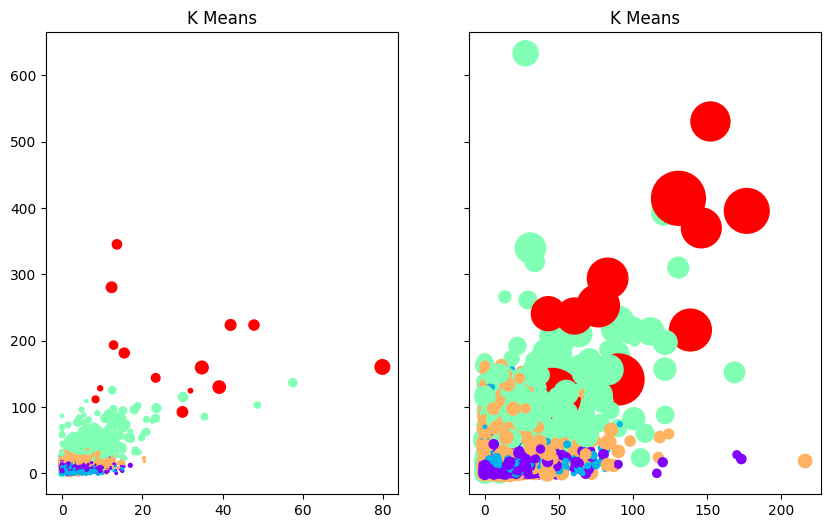

In [18]:
f, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('K Means')
ax2.scatter(X[:, 3], X[:, 4], X[:, 5],c=kmeans.labels_,cmap='rainbow');


**Punto 2)**

- Estandarizando

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [19]:
chile.drop(['CodPais'],axis=1,inplace=True)
chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80184 entries, 0 to 80183
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PUP_Lbel    80184 non-null  float64
 1   PUP_Esika   80184 non-null  float64
 2   PUP_Cyzone  80184 non-null  float64
 3   PUP_CP      80184 non-null  float64
 4   PUP_FG      80184 non-null  float64
 5   PUP_MQ      80184 non-null  float64
 6   PUP_TC      80184 non-null  float64
 7   PUP_TF      80184 non-null  float64
dtypes: float64(8)
memory usage: 5.5 MB


In [20]:
## Estandarizamos las variables
scaler = StandardScaler()
scaler.fit(chile)

StandardScaler()

In [21]:
## Se estandariza la data de chile
scaled_data = scaler.transform(chile)

- 5means estandarizado Chile

In [22]:
## Data estandarizada
chile_es=scaled_data

In [23]:
chile_es.shape

(80184, 8)

In [24]:
chile_es

array([[ 6.68737628e-01,  1.74164151e-01, -1.17665884e+00, ...,
         9.84213904e-01, -9.66063121e-01, -1.16814494e+00],
       [-5.42008212e-01, -8.29423640e-01, -4.18206250e-01, ...,
        -5.59528702e-01,  2.51886964e-03, -1.16814494e+00],
       [-5.42008212e-01,  6.89951921e-03, -4.18206250e-01, ...,
         6.75465383e-01, -9.66063121e-01, -1.16814494e+00],
       ...,
       [ 6.33647076e-02, -7.67327967e-02, -7.21587286e-01, ...,
        -6.79597572e-01,  2.51886964e-03,  1.11511613e+00],
       [ 2.08125426e+00,  3.97178085e-01, -3.89799546e-02, ...,
         4.01022253e-01, -3.20341794e-01, -1.13976503e-03],
       [-5.42008212e-01, -5.50643678e-01, -3.42360991e-01, ...,
        -4.62331237e-01,  9.71100860e-01, -1.63510071e-01]])

In [25]:
## Contruimos un algoritmo de kmeans
kmeans = KMeans(n_clusters=5)

In [26]:
kmeans.fit(chile_es)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

Centroides

Un centroide es un vector que contiene un número para cada variable, donde cada número es la media de una variable para las observaciones en ese conglomerado. El centroide se puede considerar como el promedio multidimensional del conglomerado.

In [27]:
## Calculamos los centroides de cada cluster
kmeans.cluster_centers_

array([[ 0.12384961, -0.12531024, -0.21316595,  0.17761604, -0.20186406,
        -0.20564104,  0.4212397 ,  0.33804931],
       [-0.44878855, -0.40885018, -0.30396594, -0.49913148, -0.25791223,
        -0.31626836, -0.61234952, -0.60549854],
       [ 2.38924341,  4.05435707,  2.79273246,  2.11788661,  3.51291791,
         3.44991235,  1.34173417,  1.78258261],
       [ 0.54411019,  0.8501796 ,  0.92904269,  0.57873393,  0.72176969,
         0.86905588,  0.37355508,  0.50248589],
       [16.70234473, 23.11911327, 15.46038291, 10.0240802 , 17.80498644,
        22.15499083,  6.42019294,  8.28985109]])

In [28]:
## Etiquetamos las observaciones
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [29]:
a = pd.DataFrame({'kmeans_labels':kmeans.labels_})

In [30]:
## Distribución de observaciones en los cluster
a['kmeans_labels'].value_counts()

1    33351
0    31620
3    13896
2     1294
4       23
Name: kmeans_labels, dtype: int64

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


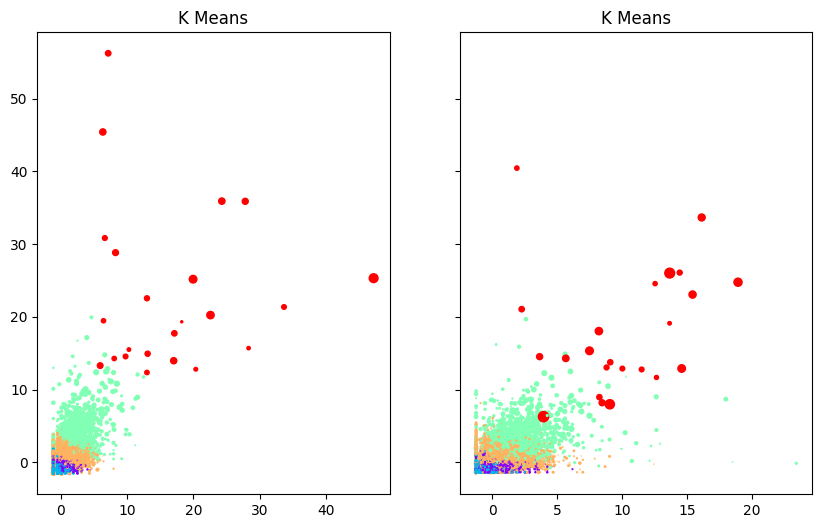

In [31]:
f, (ax1_ch,ax2_ch) = plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1_ch.set_title('K Means')
ax1_ch.scatter(chile_es[:, 0], chile_es[:, 1], chile_es[:, 2],c=kmeans.labels_,cmap='rainbow')
ax2_ch.set_title('K Means')
ax2_ch.scatter(chile_es[:, 3], chile_es[:, 4], chile_es[:, 5],c=kmeans.labels_,cmap='rainbow');

**Punto 3)**


- Decilando variables


In [32]:
chile['decile_Lbel'] = pd.qcut(chile['PUP_Lbel'], 10, labels=False, duplicates='drop')
chile['decile_Esika'] = pd.qcut(chile['PUP_Esika'], 10, labels=False, duplicates='drop')
chile['decile_Cyzone'] = pd.qcut(chile['PUP_Cyzone'], 10, labels=False, duplicates='drop')
chile['decile_CP'] = pd.qcut(chile['PUP_CP'], 10, labels=False, duplicates='drop')
chile['decile_FG'] = pd.qcut(chile['PUP_FG'], 10, labels=False, duplicates='drop')
chile['decile_MQ'] = pd.qcut(chile['PUP_MQ'], 10, labels=False, duplicates='drop')
chile['decile_TC'] = pd.qcut(chile['PUP_TC'], 10, labels=False, duplicates='drop')
chile['decile_TF'] = pd.qcut(chile['PUP_TF'], 10, labels=False, duplicates='drop')
chile

,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF,decile_Lbel,decile_Esika,decile_Cyzone,decile_CP,decile_FG,decile_MQ,decile_TC,decile_TF
0,3.0000,10.0000,1.0000,0.0000,0.0000,69.0000,0.0,0.0000,5,6,0,0,0,8,0,0
1,1.0000,4.0000,3.0000,1.0000,5.0000,24.0000,6.0,0.0000,0,0,3,0,0,2,1,0
2,1.0000,9.0000,3.0000,0.0000,12.0000,60.0000,0.0,0.0000,0,5,3,0,2,8,0,0
3,0.0000,4.0000,6.0000,1.0000,0.0000,38.0000,0.0,11.0000,0,0,8,0,0,5,0,5
4,0.0000,6.0000,6.0000,0.0000,10.0000,48.0000,0.0,0.0000,0,2,8,0,1,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80179,8.0000,42.6667,13.6667,68.8333,77.6667,133.6667,22.4,39.6000,7,9,9,8,9,9,5,7
80180,1.6667,15.1667,2.5000,6.0000,43.8333,44.1667,3.0,7.4000,2,9,2,1,9,6,0,3
80181,2.0000,8.5000,2.2000,20.8000,15.3333,20.5000,6.0,15.0000,3,5,2,7,4,1,1,6
80182,5.3333,11.3333,4.0000,16.6667,16.6667,52.0000,4.0,7.6667,7,7,5,7,4,7,0,3


- 5means decilado Chile

In [33]:
X_dech = np.array(chile[["decile_Lbel","decile_Esika","decile_Cyzone","decile_CP","decile_FG","decile_MQ","decile_TC","decile_TF"]])
X_dech.shape

(80184, 8)

In [ ]:
kmeans = KMeans(n_clusters=5)

In [ ]:
kmeans.fit(X_dech)

C:\Users\avaldiviac\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

Centroides

In [34]:
kmeans.cluster_centers_

array([[ 0.12384961, -0.12531024, -0.21316595,  0.17761604, -0.20186406,
        -0.20564104,  0.4212397 ,  0.33804931],
       [-0.44878855, -0.40885018, -0.30396594, -0.49913148, -0.25791223,
        -0.31626836, -0.61234952, -0.60549854],
       [ 2.38924341,  4.05435707,  2.79273246,  2.11788661,  3.51291791,
         3.44991235,  1.34173417,  1.78258261],
       [ 0.54411019,  0.8501796 ,  0.92904269,  0.57873393,  0.72176969,
         0.86905588,  0.37355508,  0.50248589],
       [16.70234473, 23.11911327, 15.46038291, 10.0240802 , 17.80498644,
        22.15499083,  6.42019294,  8.28985109]])

In [35]:
 kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

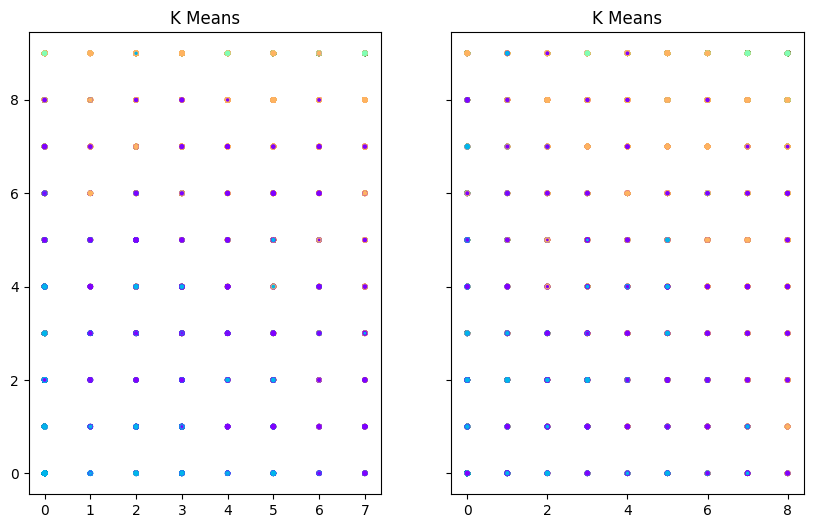

In [36]:
f, (ax1_dech,ax2_dech) = plt.subplots(1,2, sharey=True,figsize=(10,6))
ax1_dech.set_title('K Means')
ax1_dech.scatter(X_dech[:, 0], X_dech[:, 1], X_dech[:, 2],c=kmeans.labels_,cmap='rainbow')
ax2_dech.set_title('K Means')
ax2_dech.scatter(X_dech[:, 3], X_dech[:, 4], X_dech[:, 5],c=kmeans.labels_,cmap='rainbow')

In [37]:
chile_decilado = pd.DataFrame(X_dech)
chile_decilado

,0,1,2,3,4,5,6,7
0,5,6,0,0,0,8,0,0
1,0,0,3,0,0,2,1,0
2,0,5,3,0,2,8,0,0
3,0,0,8,0,0,5,0,5
4,0,2,8,0,1,7,0,0
...,...,...,...,...,...,...,...,...
80179,7,9,9,8,9,9,5,7
80180,2,9,2,1,9,6,0,3
80181,3,5,2,7,4,1,1,6
80182,7,7,5,7,4,7,0,3


In [39]:
chile_dec = pd.concat([chile_decilado,pd.DataFrame({'kmeans.labels':kmeans.labels_})],axis=1)

In [40]:
chile_dec['kmeans.labels'].value_counts()

1    33351
0    31620
3    13896
2     1294
4       23
Name: kmeans.labels, dtype: int64

In [41]:
chile_dech = pd.concat([chile_real,pd.DataFrame({'kmeans.labels':kmeans.labels_})],axis=1)

In [42]:
## Calculamos los promedios por cada variables y cada cluster
chile_dech.groupby('kmeans.labels').mean()

,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF
kmeans.labels,,,,,,,,
0,2.101271,8.209744,3.539337,12.548845,17.440915,34.298930,8.604317,9.885984
1,1.154028,6.515833,3.301649,6.615979,16.585175,31.101691,2.191653,3.703744
2,5.843676,33.205423,11.468470,29.499833,73.719796,140.902550,14.302731,19.393753
3,2.792534,14.039575,6.554303,16.022347,31.423898,65.653550,8.285149,10.989068
4,29.485504,147.177530,44.871013,98.607252,290.228265,686.126817,45.755070,62.134787


In [43]:
chile_dech.groupby('kmeans.labels').var()

,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF
kmeans.labels,,,,,,,,
0,1.662153,6.764507,2.313060,52.079503,68.001285,197.283709,36.399164,32.766279
1,1.125807,8.510570,3.963474,34.149060,100.838255,298.582181,10.552319,15.985300
2,10.978546,167.826769,28.067839,343.488205,1200.165974,4287.113408,88.739495,134.018962
3,2.837990,19.771892,5.831681,84.547892,227.674746,531.077763,38.986450,43.892534
4,296.896137,4587.997349,524.030940,1636.357724,16832.072983,156056.289556,971.891873,1329.755874


**Punto 4)**

- 3 componentes principales

In [44]:
#from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=3)

In [46]:
pca.fit(chile_es)

PCA(n_components=3)

In [47]:
x_pca = pca.transform(chile_es)

In [48]:
chile_es.shape #Original

(80184, 8)

In [49]:
x_pca.shape  #Con 3 componentes principales

(80184, 3)

- 5means 3 componentes principales Chile

In [50]:
kmeans = KMeans(n_clusters=5)

In [51]:
kmeans.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

Centroides

In [52]:
kmeans.cluster_centers_
### El segundo cluster presenta la mayor cantidad de clientes
### cluster 2: 2do componente

array([[ 1.57054131e-02, -6.79177715e-01,  8.87850558e-03],
       [-1.12073336e+00,  5.46778510e-01,  5.13807763e-03],
       [ 4.47810308e+01,  5.37742198e+00,  9.12937096e-01],
       [ 8.17396350e+00,  7.85615917e-01, -1.41303579e-01],
       [ 2.06566634e+00,  1.53363493e-01, -2.38921909e-02]])

In [53]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


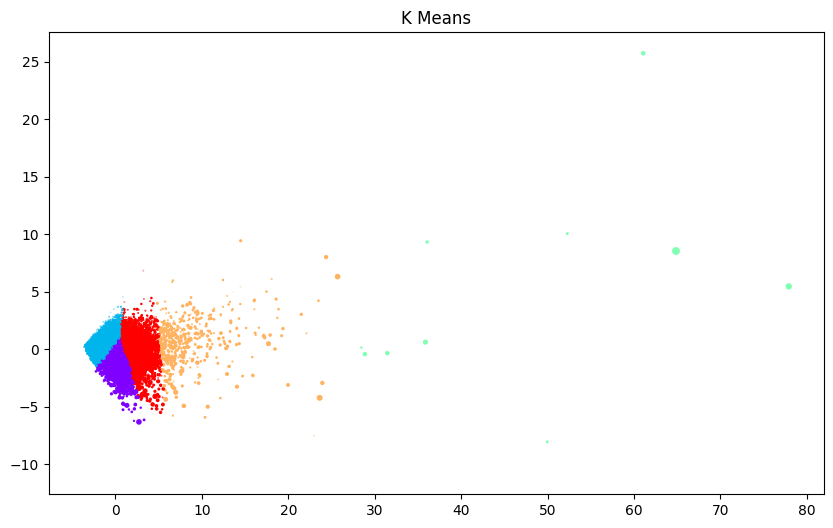

In [54]:
f, (ax1_pca) = plt.subplots(1, sharey=True,figsize=(10,6))
ax1_pca.set_title('K Means')
ax1_pca.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2],c=kmeans.labels_,cmap='rainbow');

In [57]:
from mpl_toolkits.mplot3d import Axes3D
# Predicting the clusters
labels = kmeans.predict(x_pca)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','black','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 640x480 with 0 Axes>

In [58]:
copy =  pd.DataFrame()
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,31875
1,green,34016
2,blue,23
3,black,1196
4,yellow,13074


In [59]:
pca.components_
###En esta matriz numerosa, cada fila representa un componente principal y cada columna
###se relaciona con las características originales.

array([[ 0.32511089,  0.46557817,  0.37273229,  0.29659698,  0.36759551,
         0.42916906,  0.2300604 ,  0.28000075],
       [-0.30159141,  0.14670329,  0.40034252, -0.33254154,  0.19438148,
         0.34121245, -0.54859614, -0.40186431],
       [ 0.30367845, -0.04855671, -0.07095242, -0.28467815, -0.21888735,
         0.12534999, -0.55118402,  0.67224819]])

In [60]:
chile.drop(['decile_Lbel','decile_Esika','decile_Cyzone','decile_CP','decile_FG','decile_MQ','decile_TC','decile_TF'],axis=1,inplace=True)

In [61]:
chile.keys()

Index(['PUP_Lbel', 'PUP_Esika', 'PUP_Cyzone', 'PUP_CP', 'PUP_FG', 'PUP_MQ',
       'PUP_TC', 'PUP_TF'],
      dtype='object')

In [62]:
df_comp = pd.DataFrame(pca.components_,columns=['PUP_Lbel', 'PUP_Esika', 'PUP_Cyzone', 'PUP_CP', 'PUP_FG', 'PUP_MQ',
       'PUP_TC', 'PUP_TF'])
df_comp
### Contribución de cada variable a los componentes respectivos

,PUP_Lbel,PUP_Esika,PUP_Cyzone,PUP_CP,PUP_FG,PUP_MQ,PUP_TC,PUP_TF
0,0.325111,0.465578,0.372732,0.296597,0.367596,0.429169,0.230060,0.280001
1,-0.301591,0.146703,0.400343,-0.332542,0.194381,0.341212,-0.548596,-0.401864
2,0.303678,-0.048557,-0.070952,-0.284678,-0.218887,0.125350,-0.551184,0.672248


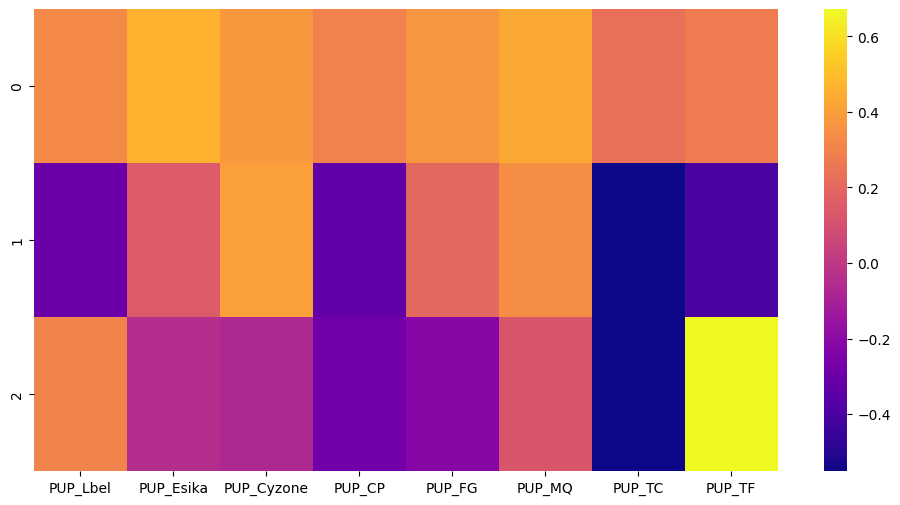

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',);
### A que componenetes estan asociadas las variables
### Segunda componente: Cyzone y Maquillaje